In [48]:
import string
import pandas as pd
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

In [2]:
data = pd.read_csv('sample_data_cleaned.csv')
data

,id,title,text,labels,text_stemmed
0,6,Percentage width child element in absolutely p...,absolutely positioned div containing several c...,"html,css",absolut posit div contain sever children one r...
1,13,Determine a User's Timezone,standard way web server able determine users t...,"javascript,html",standard way web server abl determin user time...
2,174,How do I print an HTML document from a web ser...,want print html c web service web browser cont...,html,want print html c web servic web browser contr...
3,904,How to word-break on a dash?,given relatively simple css div width 150px 12...,"html,css",given rel simpl css div width 150px 1233323332...
4,1505,How do I give my web sites an icon for iPhone?,set icon appears iphone web sites create,html,set icon appear iphon web site creat
...,...,...,...,...,...
49995,2600353,Are there any viable alternatives to wkhtmltop...,ive found wkhtmltopdf looks good surface works...,html,ive found wkhtmltopdf look good surfac work fi...
49996,2600357,"Append class=""external"" to external links",php code append classexternal links posted dom...,css,php code append classextern link post domain e...
49997,2600361,JavaScript: Reference a functions local scope ...,call function local scope erected call way dir...,javascript,call function local scope erect call way direc...
49998,2600410,How do I make a textbox take only numeric char...,need make textbox allows numeric characters iv...,jquery,need make textbox allow numer charact ive look...


In [17]:
data['html'] = data.labels.str.contains('html')
data['css'] = data.labels.str.contains('css')
data['javascript'] = data.labels.str.contains('javascript')
data['jquery'] = data.labels.str.contains('jquery')

In [5]:
# nltk.download('punkt')
texts = data.text_stemmed.str.cat(sep=' ')

#function to split text into word
tokens = word_tokenize(texts)
vocabulary = set(tokens)

print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
print(frequency_dist)
print(sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50])

176503
<FreqDist with 176503 samples and 2712906 outcomes>
['use', 'function', 'page', 'work', 'im', 'like', 'code', 'jqueri', 'var', 'javascript', 'want', 'get', 'tri', 'html', 'would', 'way', 'div', 'need', 'one', 'user', 'click', 'thank', 'text', 'element', 'file', 'return', 'imag', 'problem', 'new', 'call', 'know', 'css', 'valu', 'form', 'content', 'link', 'make', 'load', 'id', 'look', 'data', 'ive', 'set', 'chang', 'button', 'select', 'someth', 'ajax', 'follow', '0']


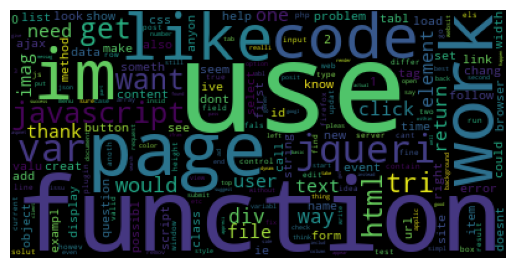

In [17]:
# Create a Wordcloud
 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [30]:
X_train = data.loc[:34999, 'text_stemmed'].values.astype('U')
y_train = data.loc[:34999, 'css'].values.astype('U')
X_test = data.loc[35000:, 'text_stemmed'].values.astype('U')
y_test = data.loc[35000:, 'css'].values.astype('U')

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(35000, 126649) (15000, 126649)


In [32]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [33]:
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.8386


In [34]:
from sklearn import svm
clf = svm.SVC()
clf.fit(train_vectors, y_train)
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.9212666666666667


In [36]:
header_names = ['id', 'title', 'text', 'labels']
input_data = pd.read_csv('training_data.tsv', sep='\t', names=header_names)

In [42]:
input_data['labels']
frequency = input_data['labels'].value_counts()

# Split the words and flatten the list
split_words = input_data['labels'].str.split(',').explode()

# Count the frequency of each unique word
frequency = split_words.value_counts()
frequency

labels
javascript    1184866
jquery         701025
html           551124
css            396953
Name: count, dtype: int64

In [47]:
input_data['label_combinations'] = input_data['labels'].str.split(',').apply(lambda x: ','.join(sorted(set(x))))
# print(input_data['label_combinations'])
# Count the frequency of each unique combination
combination_frequency = input_data['label_combinations'].value_counts()
combination_frequency

/var/folders/2v/qy72_8_x4rlf7p8462tnd8lc0000gn/T/ipykernel_73268/2545033669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data['label_combinations'] = input_data['labels'].str.split(',').apply(lambda x: ','.join(sorted(set(x))))


label_combinations
javascript                    670239
jquery                        260276
javascript,jquery             259084
css,html                      152232
html                          135425
css                           107872
html,javascript                86676
html,javascript,jquery         66400
css,html,javascript,jquery     38609
css,html,javascript            28670
html,jquery                    26031
css,javascript                 18945
css,jquery                     17301
css,html,jquery                17081
css,javascript,jquery          16243
Name: count, dtype: int64

In [45]:
print(input_data.info())
input_data = input_data.dropna(subset=['labels'])
print(input_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901102 entries, 0 to 1901101
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   title   object
 2   text    object
 3   labels  object
dtypes: int64(1), object(3)
memory usage: 58.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1901084 entries, 0 to 1901101
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   title   object
 2   text    object
 3   labels  object
dtypes: int64(1), object(3)
memory usage: 72.5+ MB
None
